In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exponential-data/exponential_data.csv


**Importing The Time-To-Failure Data And Printing It**

In [37]:
import numpy as np
import pandas as pd

# Loading the CSV file 
exponential_data = '/kaggle/input/exponential-data/exponential_data.csv'
df = pd.read_csv(exponential_data)

print(df)

    Time_to_Failure
0          0.403279
1          4.388904
2          0.472645
3          3.344722
4          2.842923
..              ...
95         4.287324
96         3.932422
97         2.905571
98         0.881365
99         6.592986

[100 rows x 1 columns]


**Applying MLE to estimate the rate parameter (λ) of the exponential distribution**

In [38]:
import numpy as np
from scipy.stats import expon
from scipy.optimize import minimize

# Provided dataset
data = df
# Define the negative log-likelihood function for the distribution
def neg_log_likelihood(params, data):
    return -np.sum(np.log(expon.pdf(data, scale=1/params[0])))

# Initial guess for the parameter
initial_guess = [1.0]

# Use the minimize function to find the MLE for the rate parameter
result = minimize(neg_log_likelihood, initial_guess, args=(data,), method='L-BFGS-B')

# The MLE estimate for the rate parameter is in the result object
lambda_estimate = result.x[0]

print(f"Estimated rate parameter: {lambda_estimate}")


Estimated rate parameter: 0.4770840084474028


In [39]:
import numpy as np

time_to_failure = df

# MLE estimation of the rate parameter (λ)
lambda_estimate = 1 / np.mean(time_to_failure)

print("MLE estimate of λ:", lambda_estimate)


MLE estimate of λ: 0.47708400462702777


**What is the expected time-to-failure?**

In [40]:
# Calculate the expected time-to-failure
expected_time_to_failure = 1 / lambda_estimate

print("Expected time-to-failure:", expected_time_to_failure)


Expected time-to-failure: 2.096066919664965


Plot

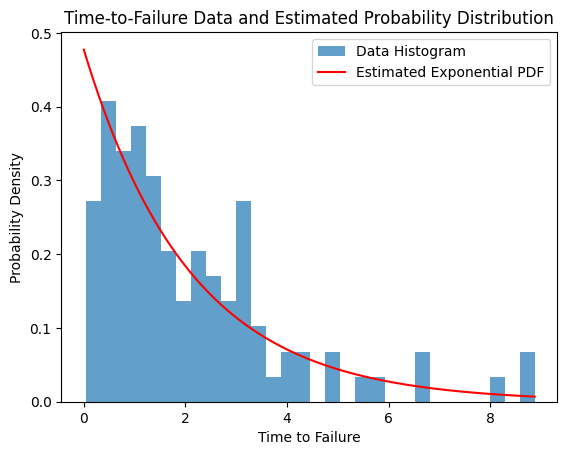

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# MLE estimation of the rate parameter (λ)
lambda_estimate = 1 / np.mean(time_to_failure)

# Generate values for the x-axis (time values)
x_values = np.linspace(0, np.max(time_to_failure), 1000)

# Plot the histogram of the data
plt.hist(time_to_failure, bins=30, density=True, alpha=0.7, label='Data Histogram')

# Plot the estimated probability density function (PDF) for the exponential distribution
plt.plot(x_values, expon.pdf(x_values, scale=1/lambda_estimate), 'r-', label='Estimated Exponential PDF')

plt.title('Time-to-Failure Data and Estimated Probability Distribution')
plt.xlabel('Time to Failure')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
